<a href="https://colab.research.google.com/github/ShounakD1991/Machine_Learning/blob/main/Health_Insurance_Cost_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
### **Importing Libraries**
---





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns=None
pd.options.display.max_rows=None
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder



---
### **Reading of Dataset and displaying first 5 enteries**
---





In [2]:
df=pd.read_csv("/content/drive/MyDrive/Data Science and Machine Learning using Python - A Bootcamp/Course_Material/S_10_Linear_Regression/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520




---
### **Encoding the categorical variables**
---





In [3]:
LE=LabelEncoder()

In [4]:
df['sex_norm']=LE.fit_transform(df['sex'])
df['smoker_norm']=LE.fit_transform(df['smoker'])
df['region_norm']=LE.fit_transform(df['region'])

In [5]:
def map_obese(column):
    mapped=[]
    for value in column:
        if value>30:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
df["obese"]=map_obese(df["bmi"])

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_norm,smoker_norm,region_norm,obese
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3,0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2,1
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2,1
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0




---
### **Statistical description of DataFrame**
---





In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
sex_norm,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
smoker_norm,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region_norm,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
obese,1338.0,0.526906,0.499462,0.0000,0.00000,1.000,1.000000,1.00000




---
### **Description of DataFrame**
---





In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   sex_norm     1338 non-null   int64  
 8   smoker_norm  1338 non-null   int64  
 9   region_norm  1338 non-null   int64  
 10  obese        1338 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 115.1+ KB




---
### **Visualization of the data**
---





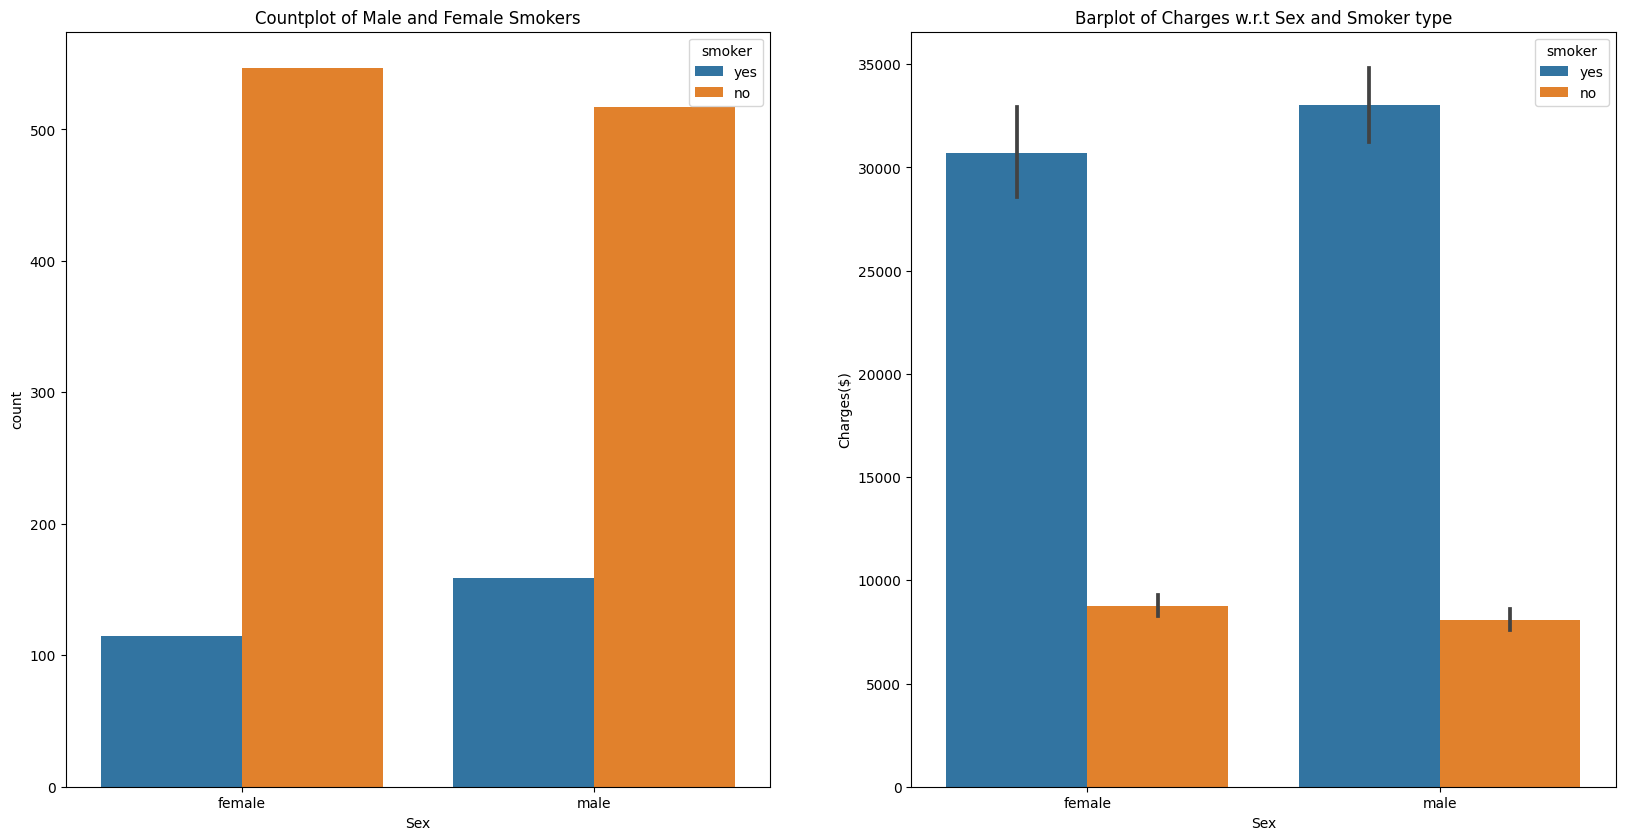

In [9]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10),dpi=100)
sns.countplot(x='sex',data=df, hue='smoker', ax = axes[0])
sns.barplot(x='sex', y='charges',data=df, hue='smoker', ax = axes[1])
axes[0].set_title("Countplot of Male and Female Smokers")
axes[1].set_title("Barplot of Charges w.r.t Sex and Smoker type")
axes[1].set_ylabel("Charges($)")
axes[1].set_xlabel("Sex")
axes[0].set_xlabel("Sex")
plt.show()

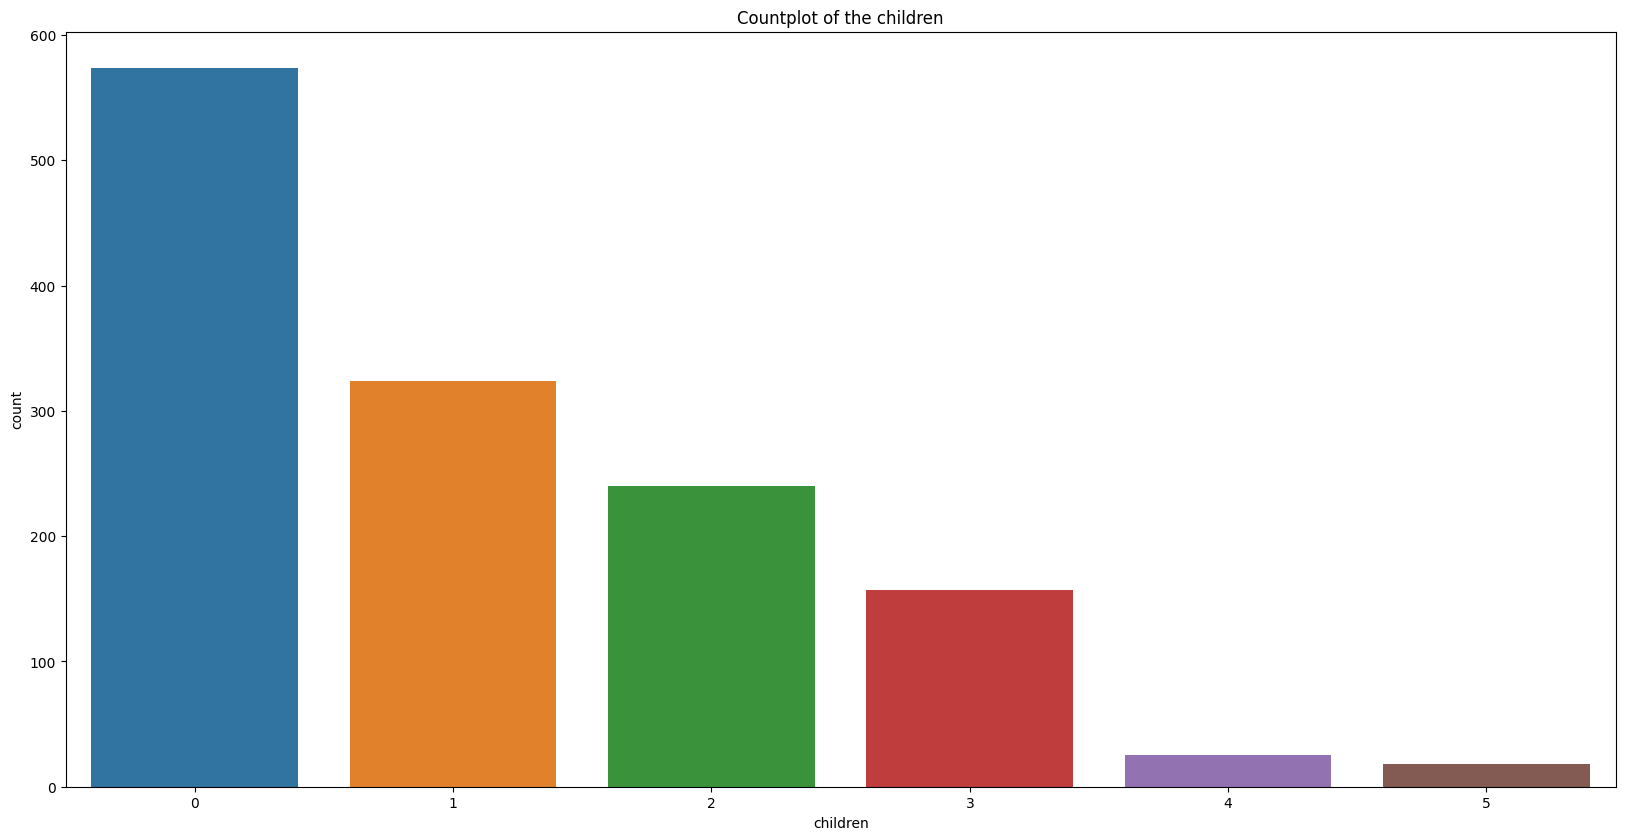

In [10]:
plt.figure(figsize=(20,10),dpi=100)
sns.countplot(x='children',data=df)
plt.title("Countplot of the children")
plt.show()

<Figure size 2000x1000 with 0 Axes>

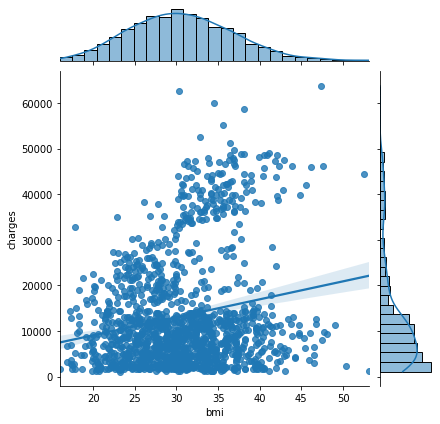

In [11]:
plt.figure(figsize=(20,10),dpi=100)
sns.jointplot(x='bmi',y='charges',data=df,kind='reg')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

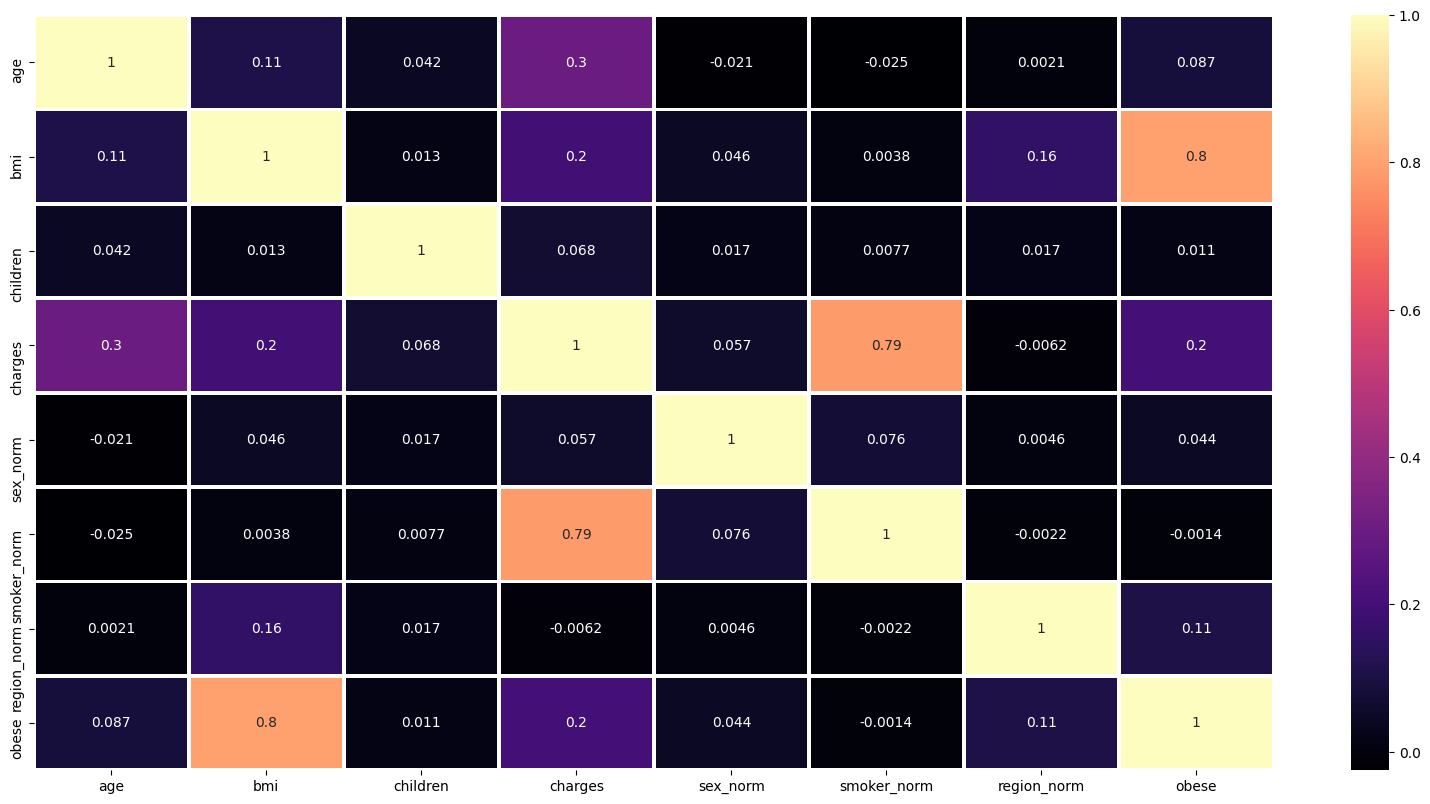

In [12]:
plt.figure(figsize=(20,10),dpi=100)
sns.heatmap(df.corr(),annot=True,cmap='magma',linewidths=2)
plt.show()



---
### **Linear Regression Model**
---





In [13]:
X=df.iloc[:,[0,2,3,7,8,9,10]]
y=df.iloc[:,6]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
LR=LinearRegression()

In [16]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
LR.intercept_

-6702.500710651382

In [18]:
LR.coef_

array([  260.98453626,    95.36808426,   352.08639656,    99.76965021,
       23689.06730346,  -265.57409147,  3675.42347545])

In [19]:
coeff=pd.DataFrame(data=LR.coef_,index=X.columns,columns=['Coefficients'])
coeff

,Coefficients
age,260.984536
bmi,95.368084
children,352.086397
sex_norm,99.769650
smoker_norm,23689.067303
region_norm,-265.574091
obese,3675.423475


In [20]:
y_test_pred=LR.predict(X_test)
y_train_pred=LR.predict(X_train)

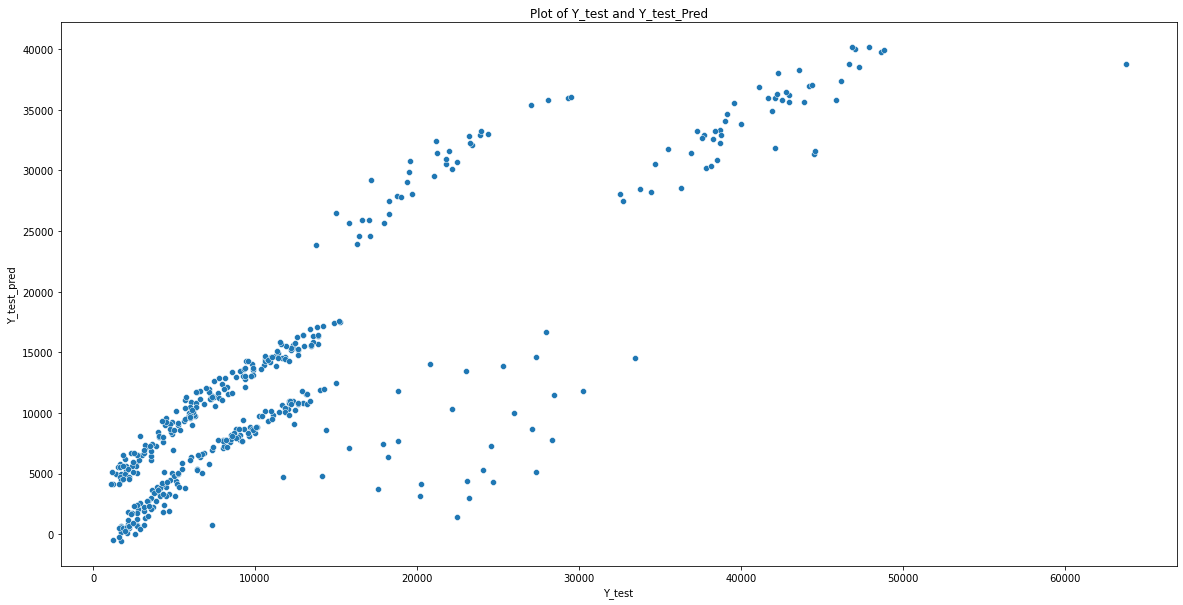

In [21]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=y_test,y=y_test_pred)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Plot of Y_test and Y_test_Pred")
plt.show()

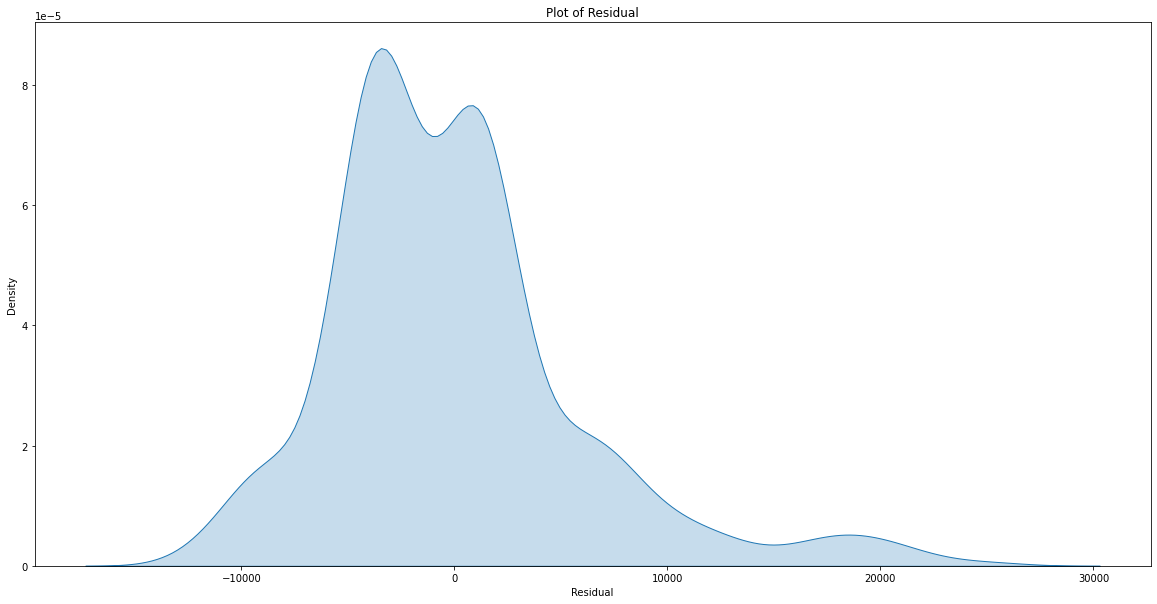

In [22]:
plt.figure(figsize=(20,10))
sns.kdeplot(y_test-y_test_pred,shade=True,)
plt.xlabel("Residual")
plt.ylabel("Density")
plt.title("Plot of Residual")
plt.show()

In [23]:
print(f"The Following Metrics are for train data\n\nMAE:{mean_absolute_error(y_train,y_train_pred):0.2f}\n\nMSE:{mean_squared_error(y_train,y_train_pred):0.2f}\n\nRMSE:{np.sqrt(mean_squared_error(y_train,y_train_pred)):0.2f}\n\nMAPE:{((mean_absolute_error(y_train,y_train_pred))/(np.mean(y_train))*100):0.2f}")

The Following Metrics are for train data

MAE:4280.71

MSE:36085504.22

RMSE:6007.12

MAPE:31.99


In [24]:
print(f"The Following Metrics are for test data\n\nMAE:{mean_absolute_error(y_test,y_test_pred):0.2f}\n\nMSE:{mean_squared_error(y_test,y_test_pred):0.2f}\n\nRMSE:{np.sqrt(mean_squared_error(y_test,y_test_pred)):0.2f}\n\nMAPE:{((mean_absolute_error(y_test,y_test_pred))/(np.mean(y_test))*100):0.2f}")

The Following Metrics are for test data

MAE:4336.99

MSE:35309753.68

RMSE:5942.20

MAPE:33.24


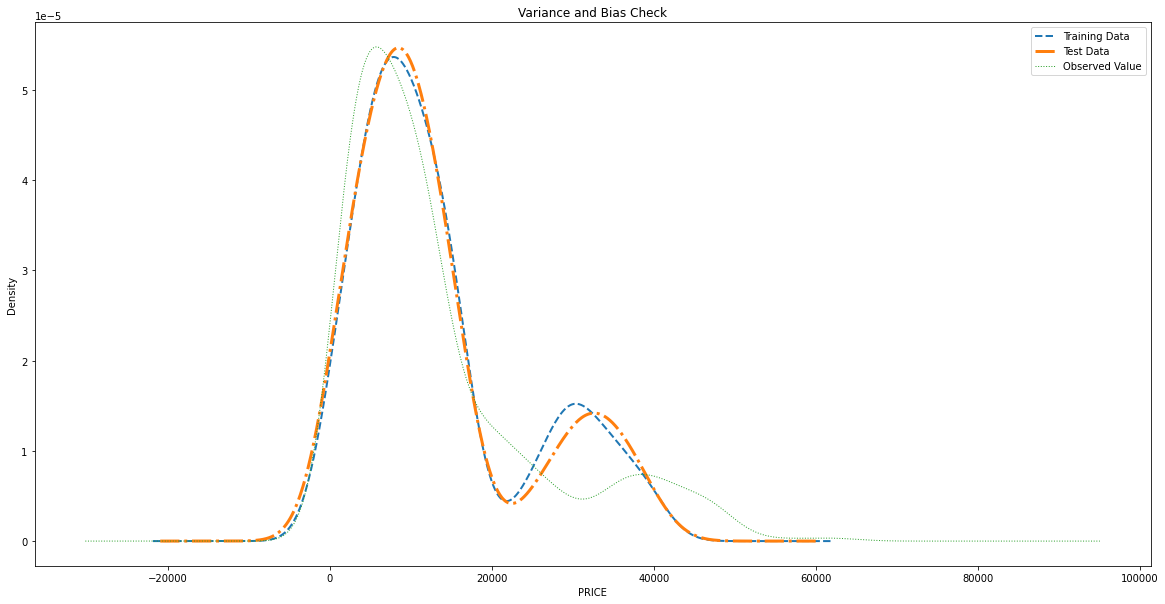

In [25]:
plt.figure(figsize=(20,10))
pd.Series(y_train_pred).sort_values().plot(kind='kde',label="Training Data",ls="--",lw=2)
pd.Series(y_test_pred).sort_values().plot(kind='kde',label="Test Data",ls="-.",lw=3)
pd.Series(y).sort_values().plot(kind='kde',label="Observed Value",ls=":",lw=1)
plt.legend()
plt.ylabel("Density")
plt.xlabel("PRICE")
plt.title("Variance and Bias Check")
plt.show()